<a href="https://colab.research.google.com/github/CharuniPremarathne/Deep_Learning_Labs/blob/main/Lab2/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [6 1 1 0 4 9 3 2 7 5]


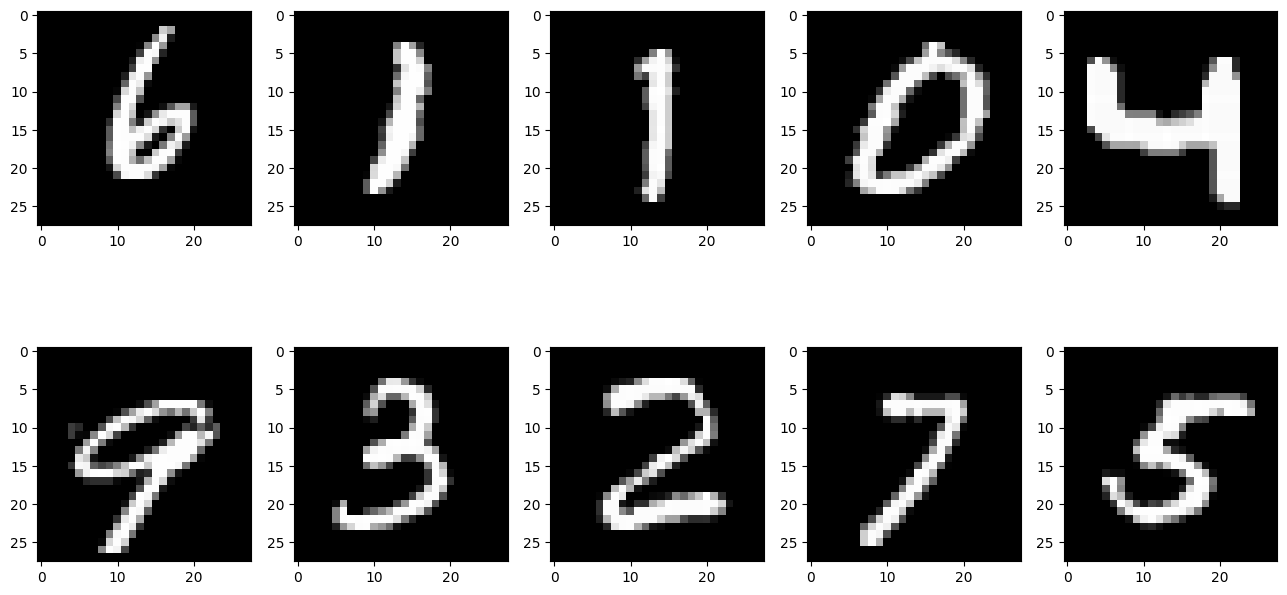

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2867 - accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0899 - accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0607 - accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9856
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - accuracy: 0.9876
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - accuracy: 0.9887
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.03

Plot the loss and accuracy graphs

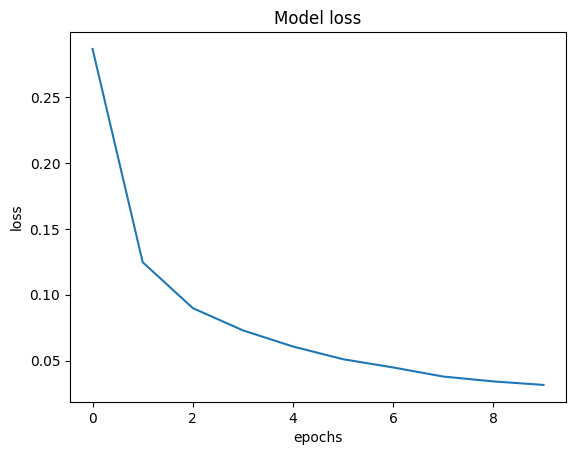

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

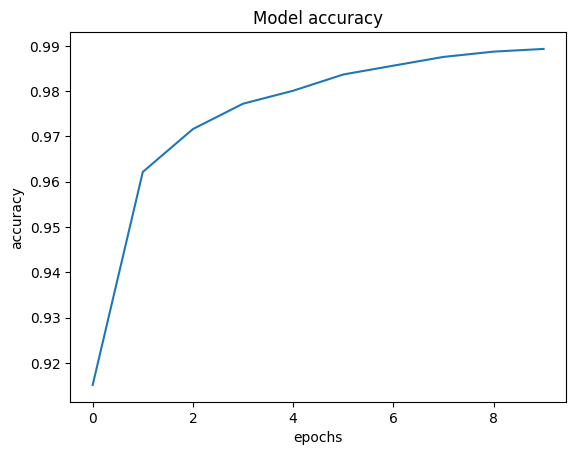

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.0911 - accuracy: 0.9769
Loss of the Test dataset is: 0.09111415594816208
Accuracy of the test dataset is: 0.9768999814987183


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')